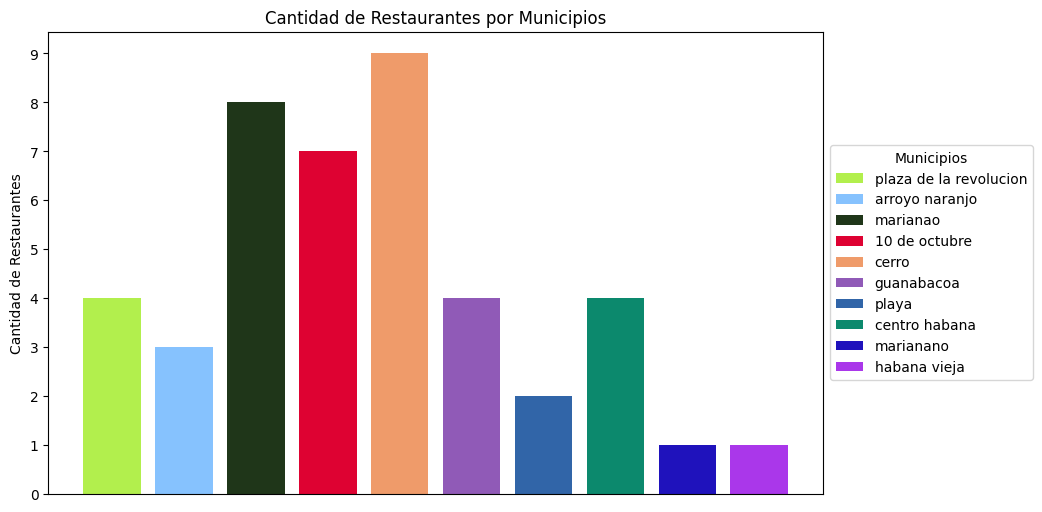

In [10]:
import matplotlib.pyplot as plt
import os
import json
import random

ruta_carpeta = "json"
archivos_json = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".json")]

cantidad_restaurantes = {}
colors = {}

for i in archivos_json:
    with open(os.path.join(ruta_carpeta, i), "r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos["municipality"].strip().lower() if "municipality" in datos and datos["municipality"] else None
        if municipio:
             if municipio not in cantidad_restaurantes:
                cantidad_restaurantes[municipio] = 1
                colors[municipio] = f'#{random.randint(0, 0xFFFFFF):06x}'
             else:
                cantidad_restaurantes[municipio] += 1

# Verificar si hay datos en cantidad_restaurantes
if not cantidad_restaurantes:
    print("No se encontraron datos de restaurantes.")
else:
    municipios = list(cantidad_restaurantes.keys())
    cantidad_restaurantes_valores = list(cantidad_restaurantes.values())

# Crear la gráfica
plt.figure(figsize=(10, 6))
for i, (municipio, cantidad) in enumerate(zip(municipios, cantidad_restaurantes_valores)): 
     plt.bar(i, cantidad, color=colors[municipio], label=municipio)

   
plt.xticks([])
plt.yticks(range(0, max(cantidad_restaurantes_valores) + 1))
plt.ylabel('Cantidad de Restaurantes')
plt.title('Cantidad de Restaurantes por Municipios')
legend_title = "Municipios"
handles, labels = plt.gca().get_legend_handles_labels() 
plt.legend(handles, labels, title=legend_title, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



Archivo: ['Asia_Cuba.json', 'Atlanta.json', 'Bar_Tropicana.json', 'Cafeteria_Obelisco.json', 'Colesterol 5.1.json', 'Crispy_Chicken.json', 'Don_Burguer.json', 'El Ranchon_de_41.json', 'el_batazo.json', 'El_Farallon.json', 'El_Faro.json', 'El_Polo.json', 'el_rápido.json', 'El_Triangulo.json', 'FoodMaster.json', 'Heredia.json', 'JA.json', "jorgito's_pizzas.json", 'kasa_takos.json', 'Lacret559.json', 'lajuliana.json', 'lamimosa.json', 'Lateral.json', 'la_barrita_onbazar.json', 'la_casona_del_cerro.json', 'La_Copa.json', 'la_lola.json', 'La_Paila.json', 'La_yuya.json', 'leyendhabana.json', 'Los_Taticos.json', 'MM.json', 'Monakeño.json', 'Mundo Pizza.json', 'Mythos.json', 'Nel_Paradiso.json', 'Pizzas_Vip.json', 'Razones_y_Motivos.json', 'Restaurante_Rodney.json', 'rico_rico.json', 'shapuseros.json', 'Tropicana.json', 'Versalles.json']
Municipio: plaza de la revolucion
Menú de pizzas: None
Archivo: ['Asia_Cuba.json', 'Atlanta.json', 'Bar_Tropicana.json', 'Cafeteria_Obelisco.json', 'Colestero

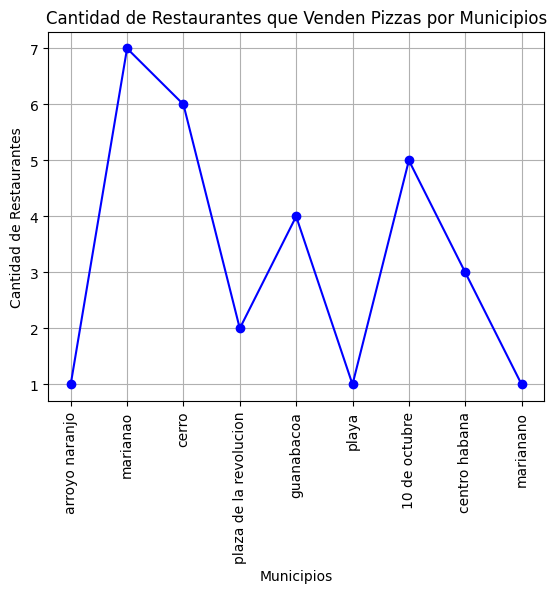

In [11]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

# Lista de archivos JSON
ruta_carpeta = "json"
archivos_json = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".json")]

# Diccionario para almacenar los restaurantes que venden pizzas por municipio
pizzas_por_municipios = {}

# Leer los menús desde cada archivo JSON y separar los restaurantes por localidad
for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta,archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        municipio = datos.get('municipality')
 
    # Normalizar el nombre del municipio 
    if municipio: 
        municipio = municipio.strip().lower() 
    menu = datos['menu'].get('pizzas', None) 

    # Verificar y depurar datos 
    print(f"Archivo: {archivos_json}") 
    print(f"Municipio: {municipio}") 
    print(f"Menú de pizzas: {menu}")

    
    # Verificar si el menú de pizzas no es null y tiene datos 
    if menu is not None and menu:
       if municipio not in pizzas_por_municipios:
          pizzas_por_municipios[municipio] = 0
       pizzas_por_municipios[municipio] += 1
    
# Mostrar los resultados
for municipio, cantidad in pizzas_por_municipios.items():
    print(f"Municipality: {municipio}, Restaurantes: {cantidad}")

# Paso 2: Crear la gráfica de barras
municipios = list(pizzas_por_municipios.keys())
cantidad_restaurantes = list(pizzas_por_municipios.values())

plt.plot(municipios, cantidad_restaurantes, marker='o', linestyle='-', color='blue')

# Personalizar la gráfica
plt.xlabel('Municipios')
plt.ylabel('Cantidad de Restaurantes')
plt.title('Cantidad de Restaurantes que Venden Pizzas por Municipios')

#asegurarse que en el eje y salgan numeros enteros
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Mostrar la gráfica
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [ ]:
import json
import os

def encontrar_menor_numero(archivos_json, claves):
    # Inicializar el menor número con un valor muy alto
    menor_numero = int()
    
    # Función recursiva para recorrer el JSON
    def recorrer(valores, claves):
        nonlocal menor_numero
        if isinstance(valores, dict):
            for key, value in valores.items():
                if key in claves and isinstance(value, int):
                    if value < menor_numero:
                        menor_numero = value
                elif isinstance(value, (dict, list)):
                    recorrer(value, claves)
        elif isinstance(valores, list):
            for value in valores:
                recorrer(value, claves)
        elif isinstance(valores, int):
            if valores < menor_numero:
                menor_numero = valores

    # Recorrer cada archivo JSON
    for archivo in archivos_json:
        with open(os.path.join(ruta_carpeta,archivo),"r", encoding="utf8") as file:
            datos = json.load(file)
            recorrer(datos, claves)
    
    return menor_numero

archivos_json = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".json")]
claves = ["strong_dishes", "desserts", "liquids"]
menor_valor = encontrar_menor_numero(archivos_json, claves)
print(f"El menor número es: {menor_valor}")


El menor número es: inf



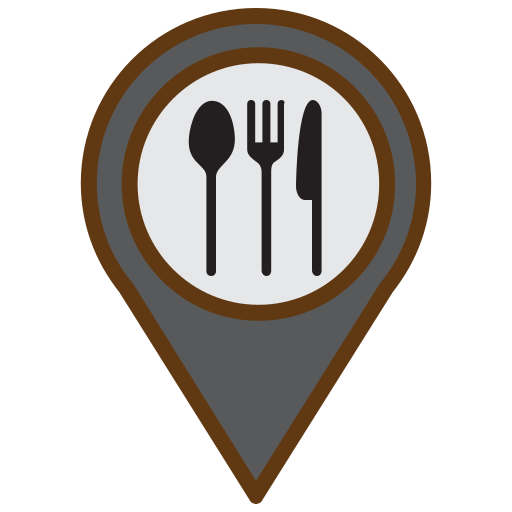
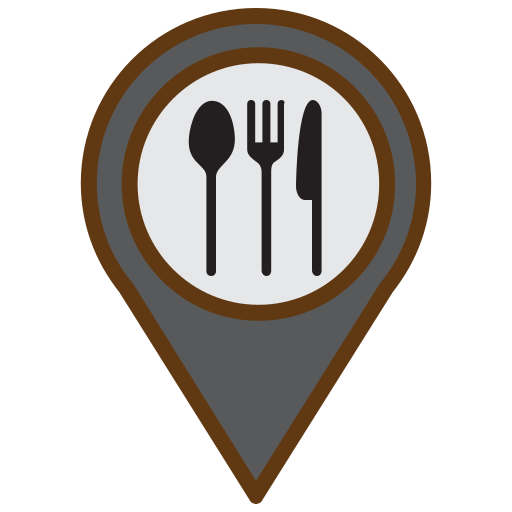
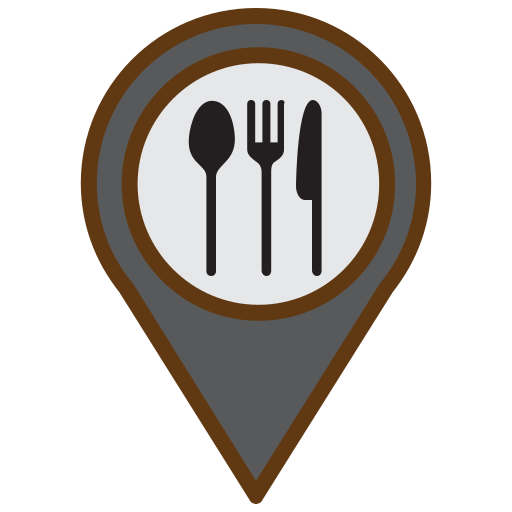
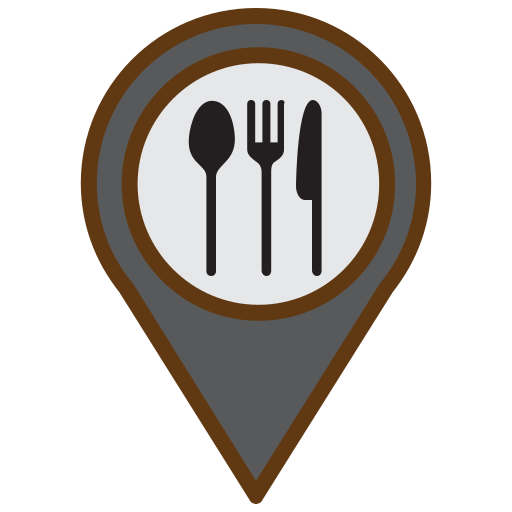
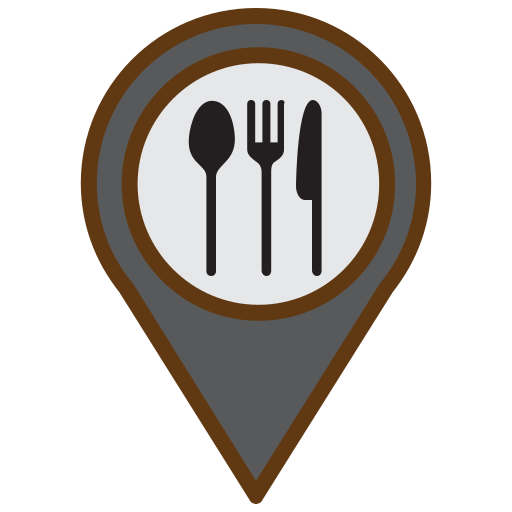
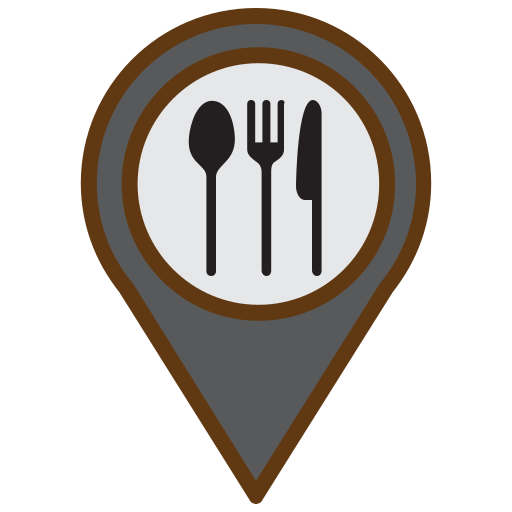
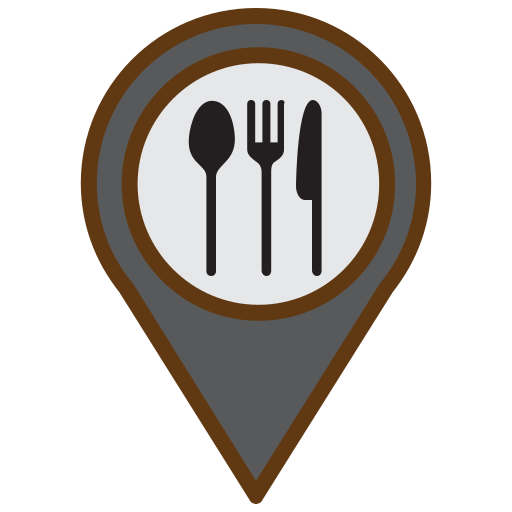
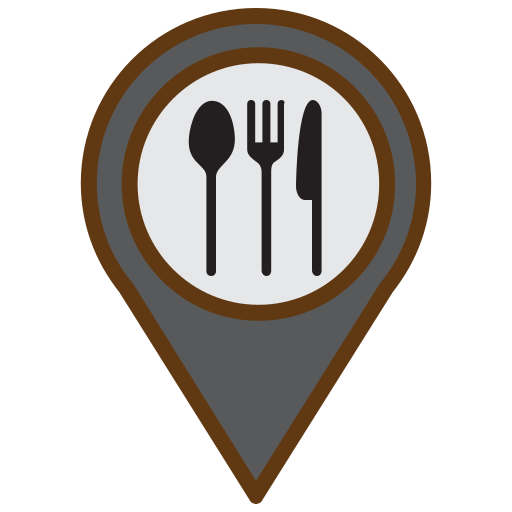
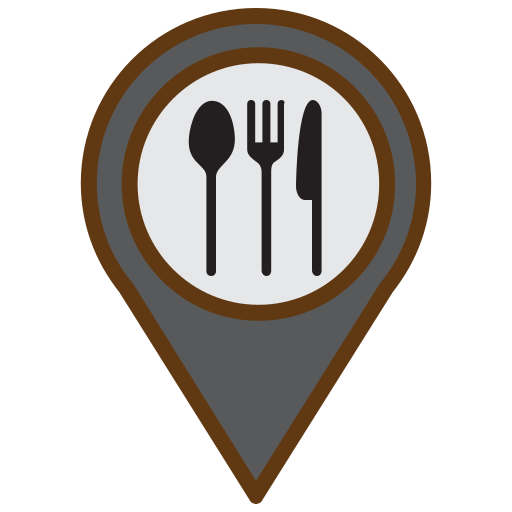
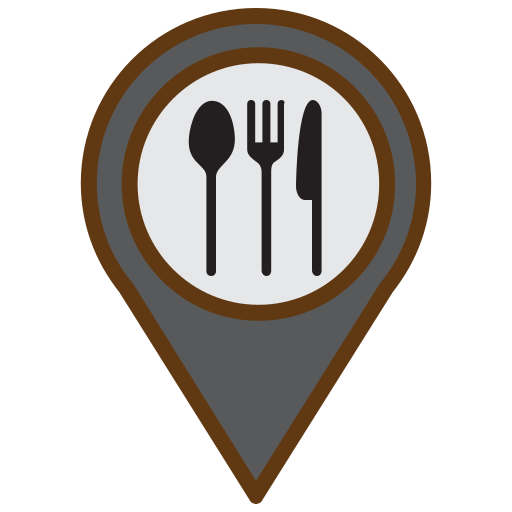
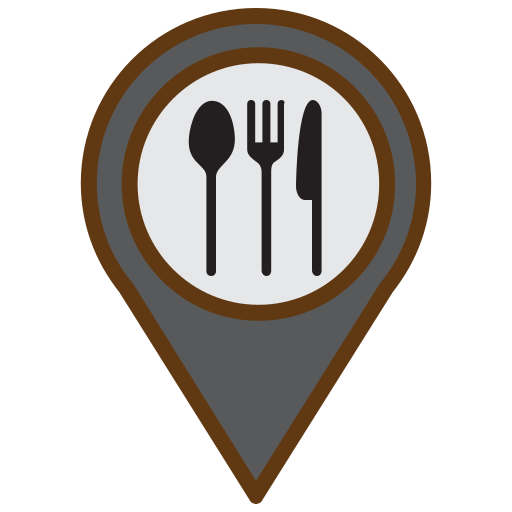
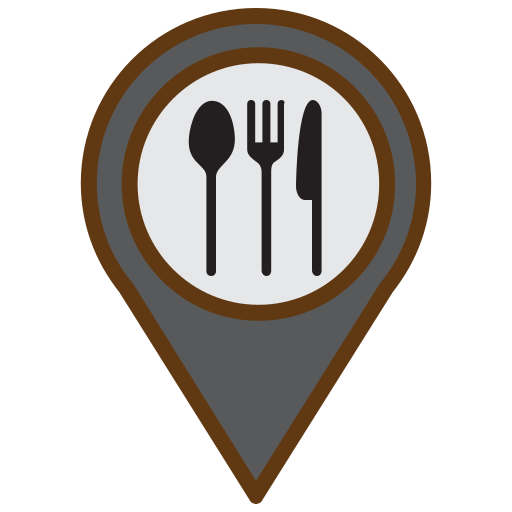
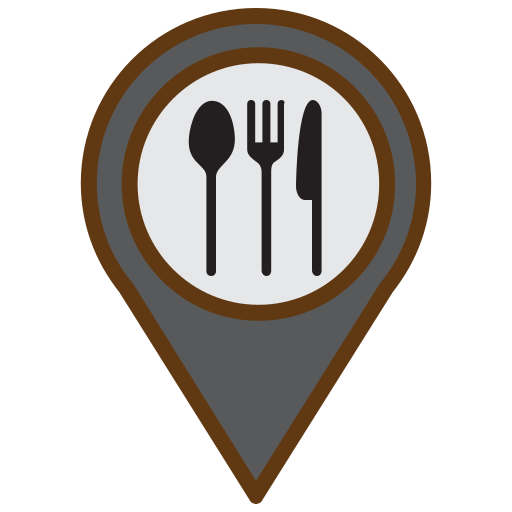
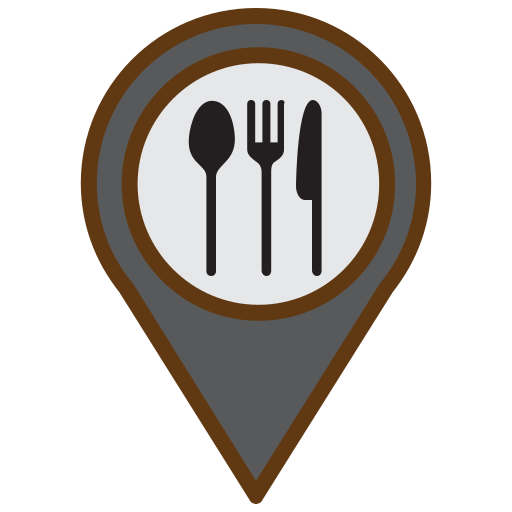
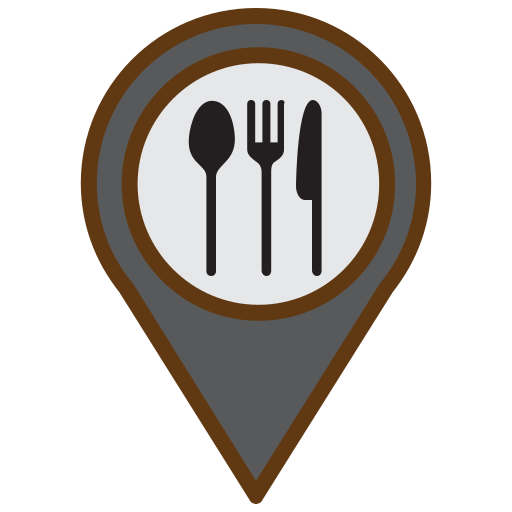
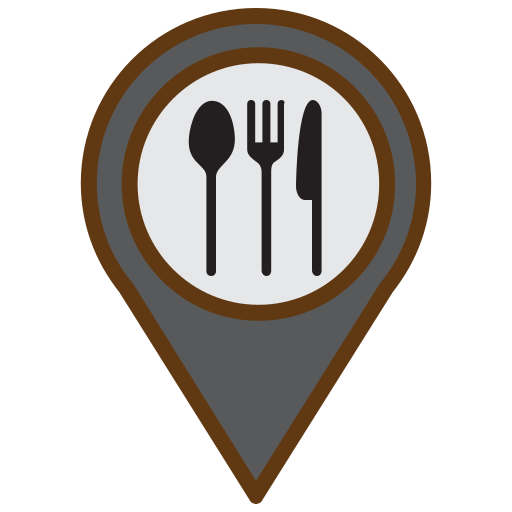
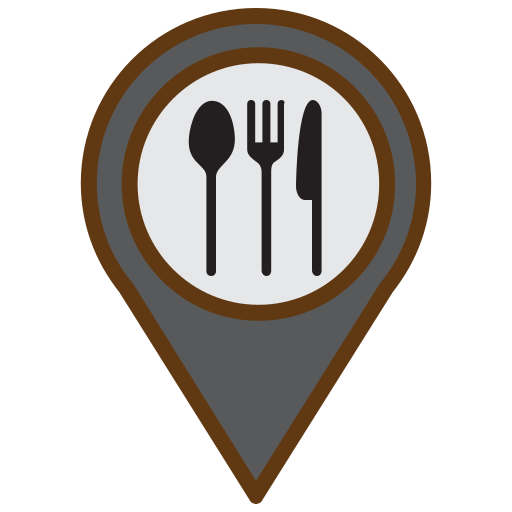
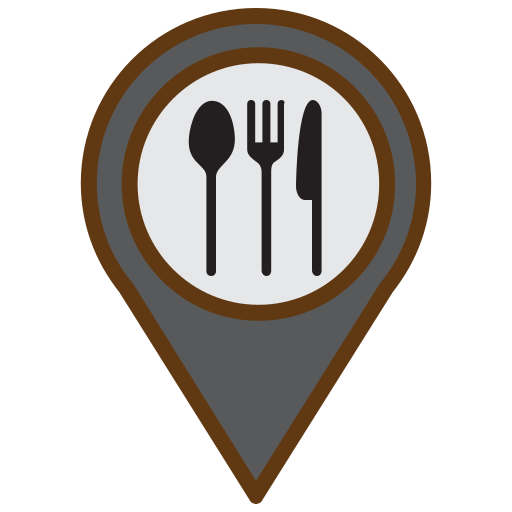
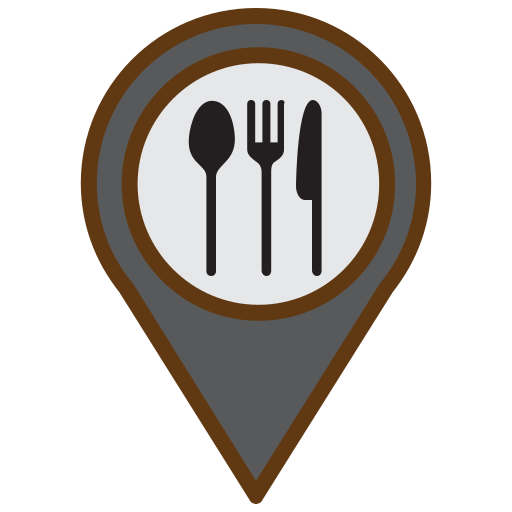
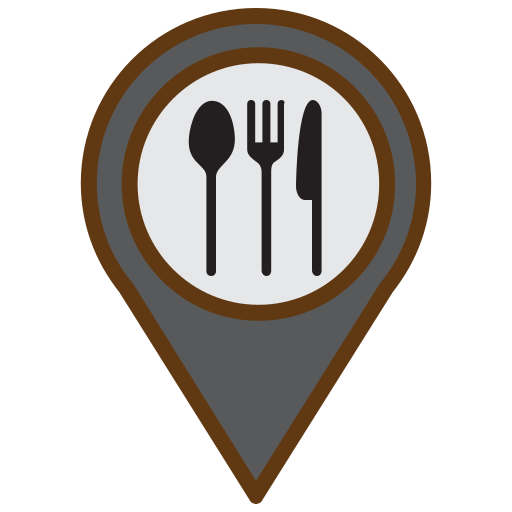
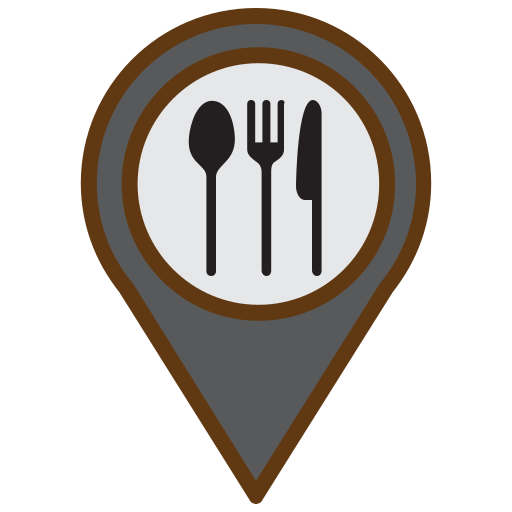
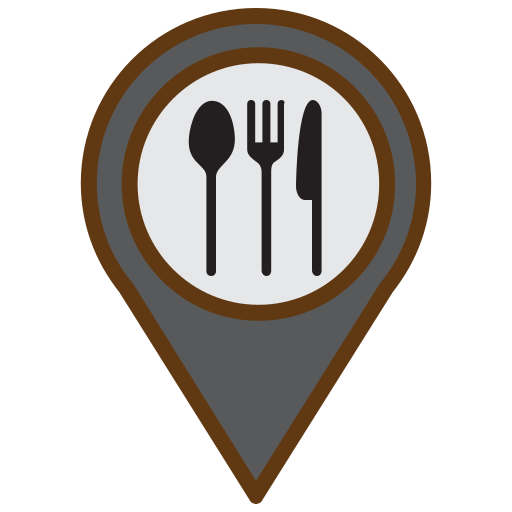
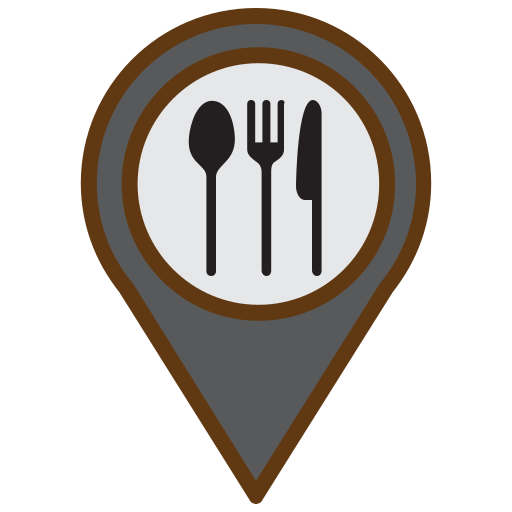
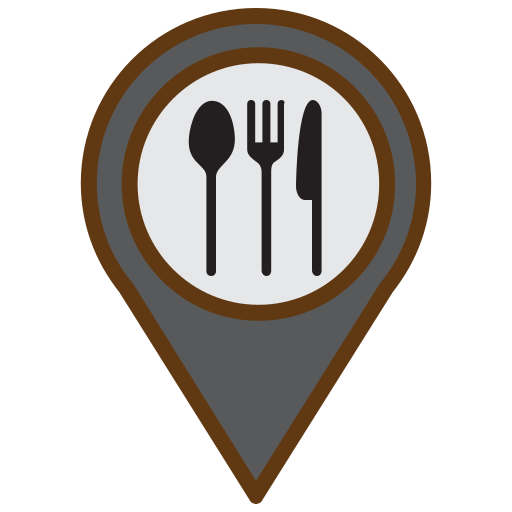
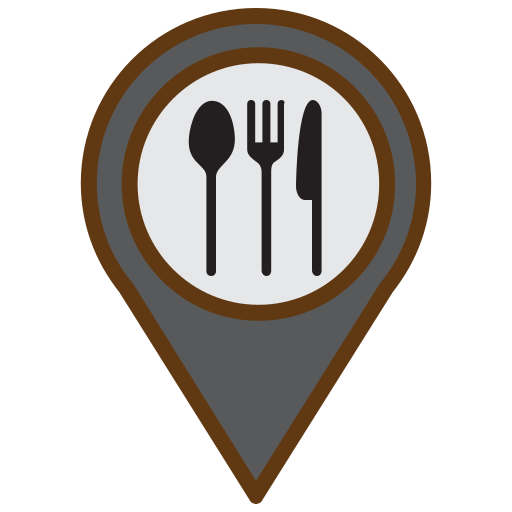
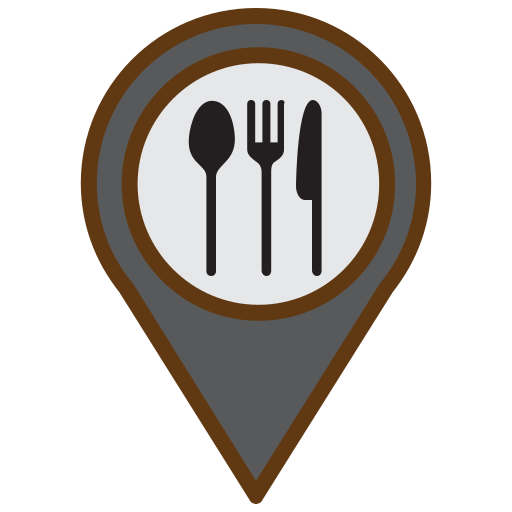
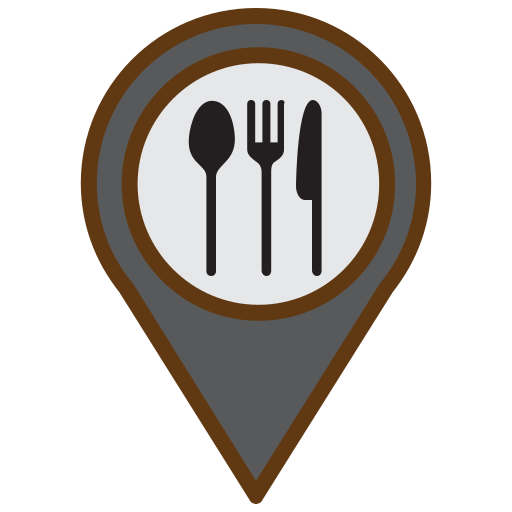
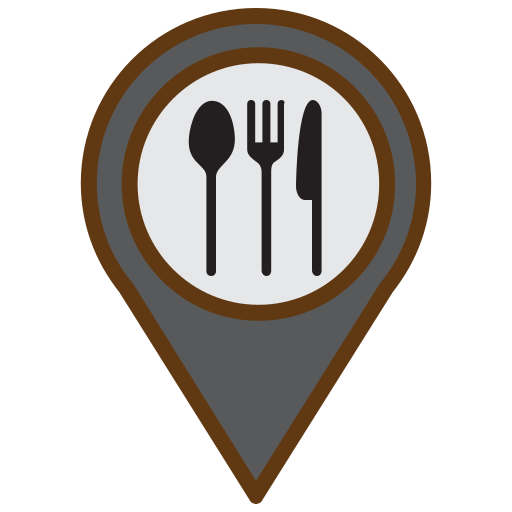
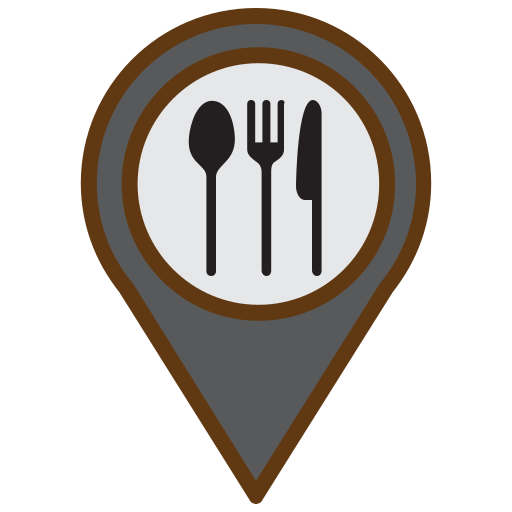
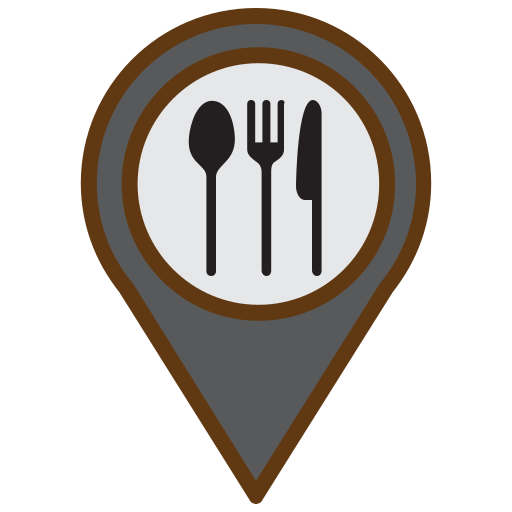
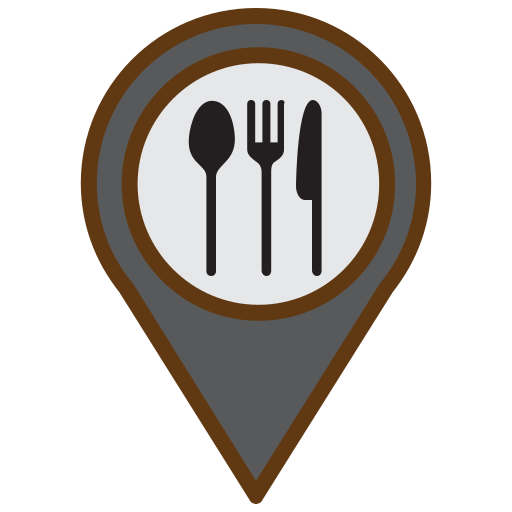
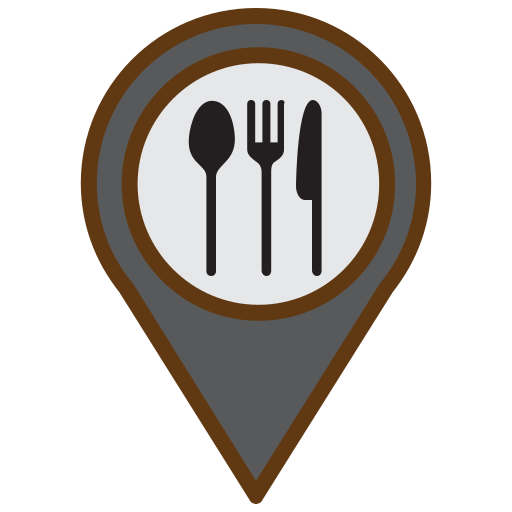
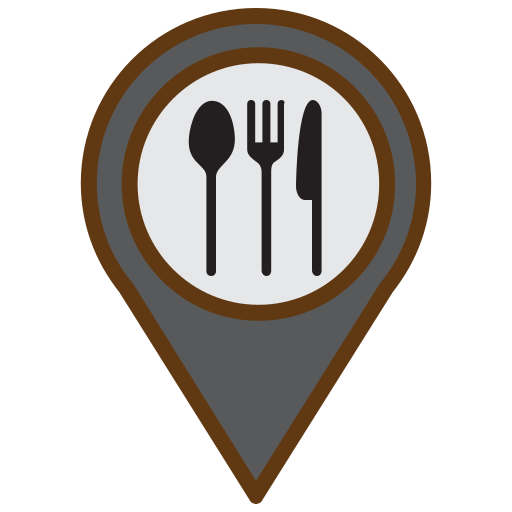
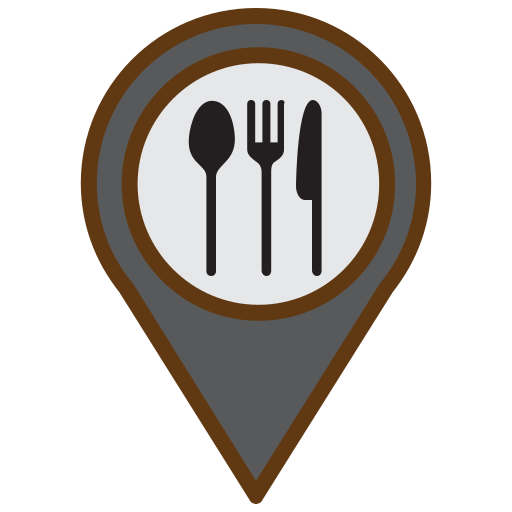
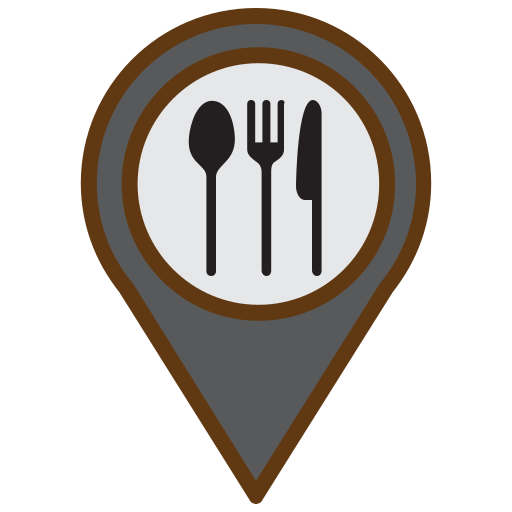
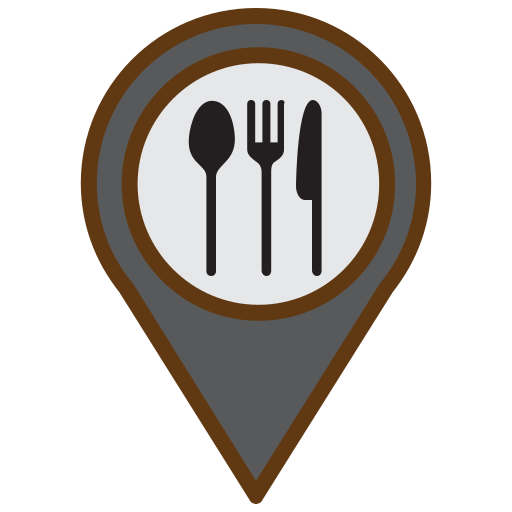
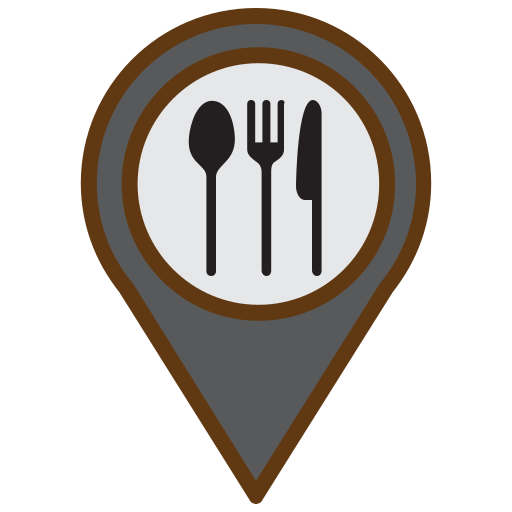
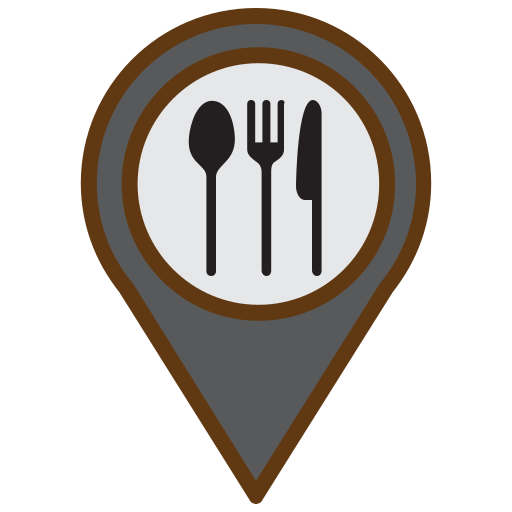
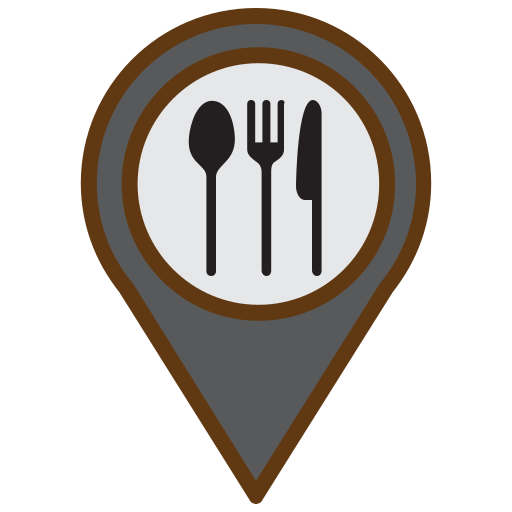
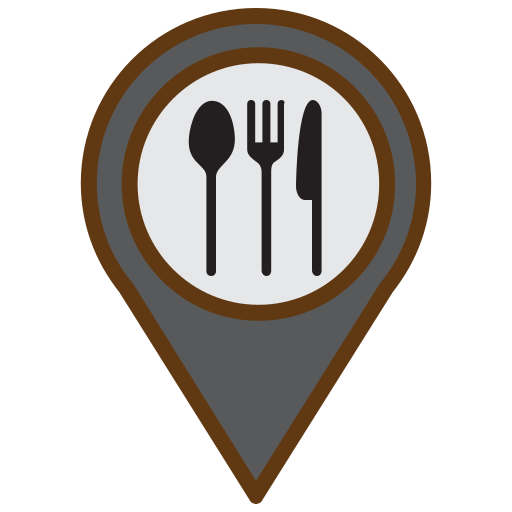
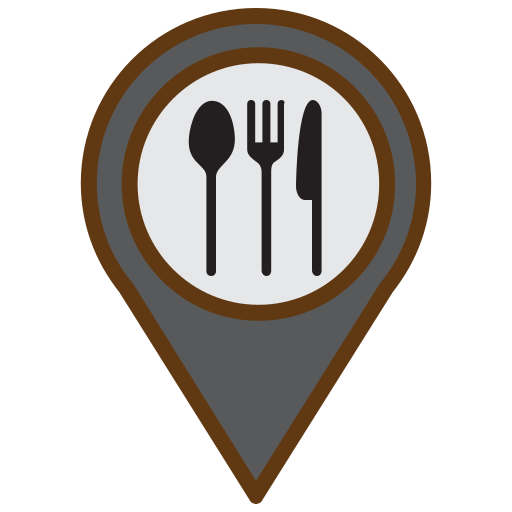
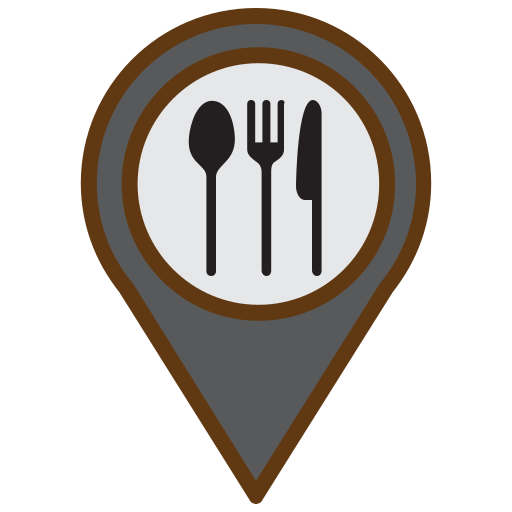
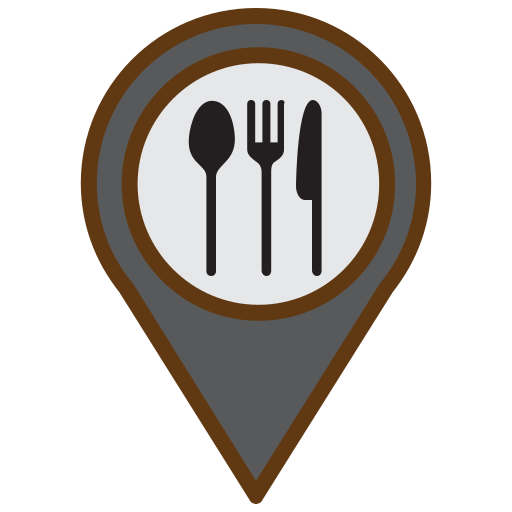

In [24]:
import folium
import json
import os

mapa = folium.Map(location = [23.075162, -82.358295],zoom_start=11)

ruta_carpeta = "json"

archivos_json = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".json")]

for archivo in archivos_json:
    with open(os.path.join(ruta_carpeta,archivo),"r", encoding="utf8") as f:
        datos = json.load(f)
        nombre = datos['name']
        latitud, longitud = datos['location']['coordinates_latitude_length']
        icono = folium.CustomIcon(icon_image="icono.png",icon_size = (30,30))
        folium.Marker(location=[latitud,longitud],popup=nombre,icon=icono).add_to(mapa)

mapa